In [21]:
from qiskit import *
from qiskit.visualization import plot_histogram
import operator
import numpy as np

In [2]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

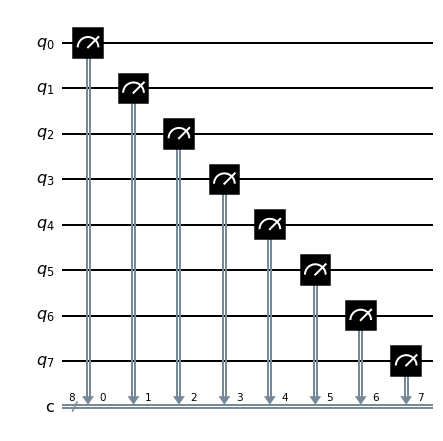

In [4]:
for j in range(n):
    qc_output.measure(j, j)
qc_output.draw('mpl')    

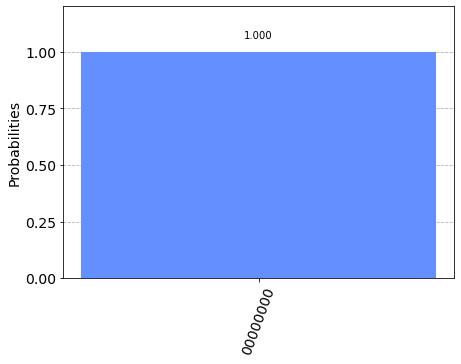

In [5]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

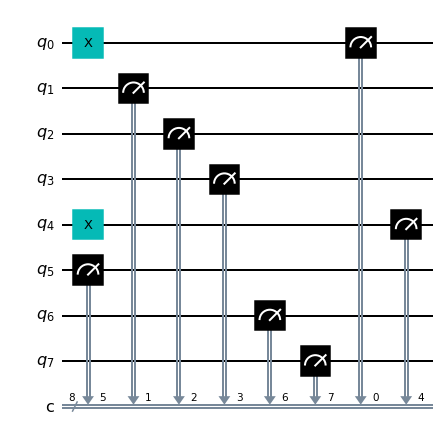

In [8]:
qc_encoder = QuantumCircuit(n_q, n_b)
qc_encoder.x([0, 4])
qc = qc_encoder + qc_output
qc.draw('mpl')

In [22]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

00010001


In [28]:
def q_add(a, b, my_backend=Aer.get_backend('qasm_simulator')):
    c_add = QuantumCircuit(4, 2)
    if a: c_add.x(0)
    if b: c_add.x(1)
    c_add.cx(0, 2)
    c_add.cx(1, 2)
    c_add.ccx(0, 1, 3)
    c_add.measure([2, 3], [0, 1])
    counts = execute(c_add, my_backend).result().get_counts()
    return max(counts.items(), key=operator.itemgetter(1))[0]

In [29]:
print(q_add(1, 1))

10


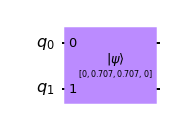

In [75]:
qc = QuantumCircuit(2)
qc.initialize([0, 1/np.sqrt(2),  1/np.sqrt(2), 0], [0, 1])
qc.draw('mpl')

In [76]:
result = execute(qc, Aer.get_backend('statevector_simulator')).result()
out_state = result.get_statevector()
print(out_state)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


In [77]:
#qc.measure_all()
#qc.draw('mpl')


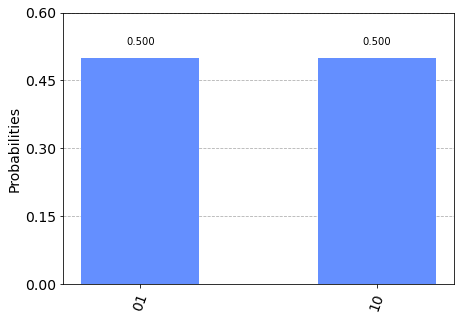

In [78]:
counts = execute(qc, Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(counts)

[0.70710678+0.j         0.        +0.70710678j]


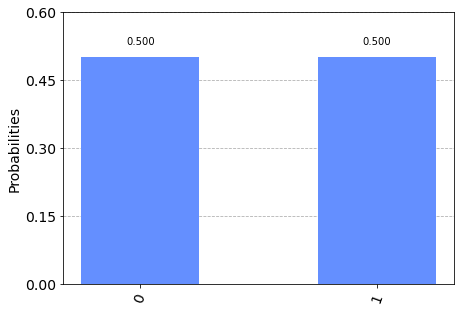

In [70]:
backend = Aer.get_backend('statevector_simulator')
initial_state = [1/np.sqrt(2), 1j/np.sqrt(2)]  # Define state |q_0>
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

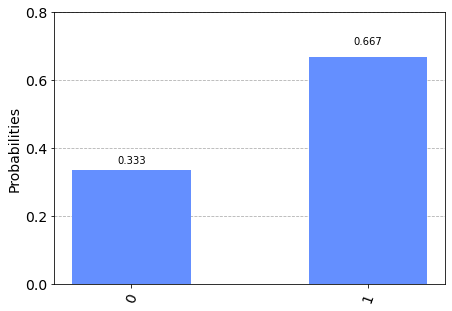

In [88]:
qc = QuantumCircuit(1)
qc.initialize([np.sqrt(1 / 3), -1j*np.sqrt(2 / 3)], 0)
counts = execute(qc, Aer.get_backend('statevector_simulator')).result().get_counts()
plot_histogram(counts)

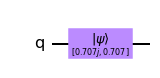

In [95]:
qc = QuantumCircuit(1)
qc.initialize([1j * np.sqrt(1 / 2), np.sqrt(1 / 2)], 0)
qc.draw('mpl')

In [96]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


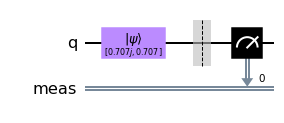

In [97]:
qc.measure_all()
qc.draw('mpl')

In [116]:
state = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = {'0': 498, '1': 526}


In [122]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

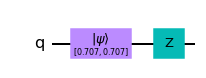

In [130]:
qc = QuantumCircuit(1)
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.z(0)
qc.draw('mpl')

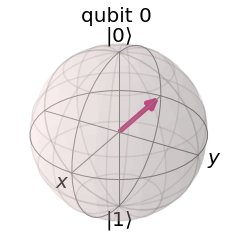

In [131]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
plot_bloch_multivector(out)

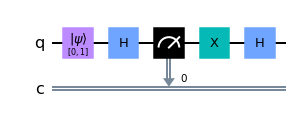

In [137]:
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Create the Y-measurement function:
def y_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.x(qubit)
    qc.h(qubit)
    return qc

initial_state = [0,1]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
y_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw('mpl')

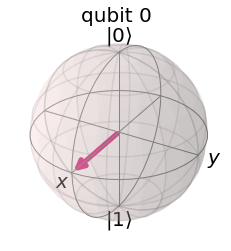

In [144]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector